# Regressão Linear - Previsão Consumo de Cerveja


## Treinamento de Modelo por Regressão Linear
#### Dataset: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo


Este Dataset aborda os impactos de diversas variáveis sobre o consumo de cerveja (que será o "target"/Y do modelo). O objetivo é que o modelo preveja o consumo médio de cerveja de acordo com o input de algumas variáveis (X's). A amostra é de uma área universitária da cidade de São Paulo - SP, do ano de 2015, com indivíduos de 18 a 28 anos de idade.

### Metadados:<br>


- **data** - Data
- **temp_media** - Temperatura Média (°C)
- **temp_min** - Temperatura Mínima (°C)
- **temp_max** - Temperatura Máxima (°C)
- **chuva** - Precipitação (mm)
- **fds** - Final de Semana (1 = Sim; 0 = Não)
- **consumo** - Consumo de Cerveja (litros)

In [69]:
# Importando as bibliotecas
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importando o Dataframe (csv)
df = pd.read_csv('cerveja3.csv', sep=';')
df.sample(10)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
97,08/04/2015,18.68,14.7,24.3,0.4,0,23362
67,09/03/2015,21.36,19.7,23.3,77.0,0,20016
95,06/04/2015,21.36,18.5,27.7,0.0,0,22356
244,02/09/2015,16.10,14.1,20.2,0.4,0,20681
292,20/10/2015,26.30,17.2,35.3,0.0,0,27871
148,29/05/2015,17.68,15.3,21.9,7.2,0,21245
130,11/05/2015,17.86,15.7,20.6,22.2,0,16956
115,26/04/2015,19.04,16.1,23.7,0.8,1,30479
75,17/03/2015,21.92,18.6,25.6,24.2,0,26275
159,09/06/2015,20.32,15.2,26.0,0.0,0,21327


In [12]:
df.shape

(365, 7)

## Análise Exploratória dos Dados

### Propriedades dos Dados

In [6]:
# Análisando informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [9]:
df.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [10]:
# Verificar se existem valores nulos no dataset
df.isnull().mean()

data          0.0
temp_media    0.0
temp_min      0.0
temp_max      0.0
chuva         0.0
fds           0.0
consumo       0.0
dtype: float64

In [11]:
# Verificar os tipos de dados existentes
df.dtypes

data           object
temp_media    float64
temp_min      float64
temp_max      float64
chuva         float64
fds             int64
consumo         int64
dtype: object

In [ ]:
# Definindo a matriz de correlação dos dados
correlacao = df.corr(numeric_only=True).round(4)
correlacao

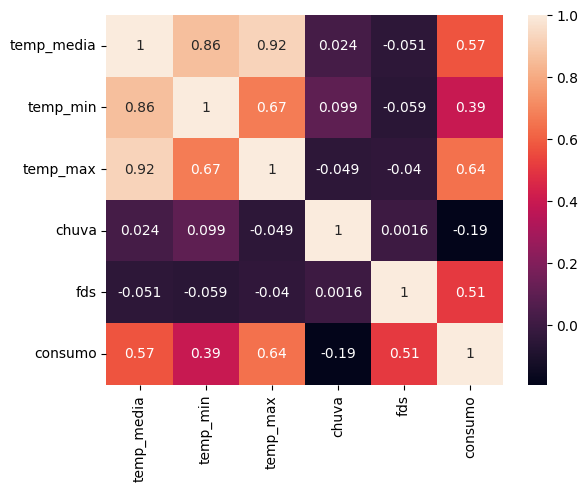

In [16]:
# Plotando a matriz de correlação
sns.heatmap(correlacao, annot=True)
plt.show

## Comportamento do target (Variável Dependente)

### Gráficos

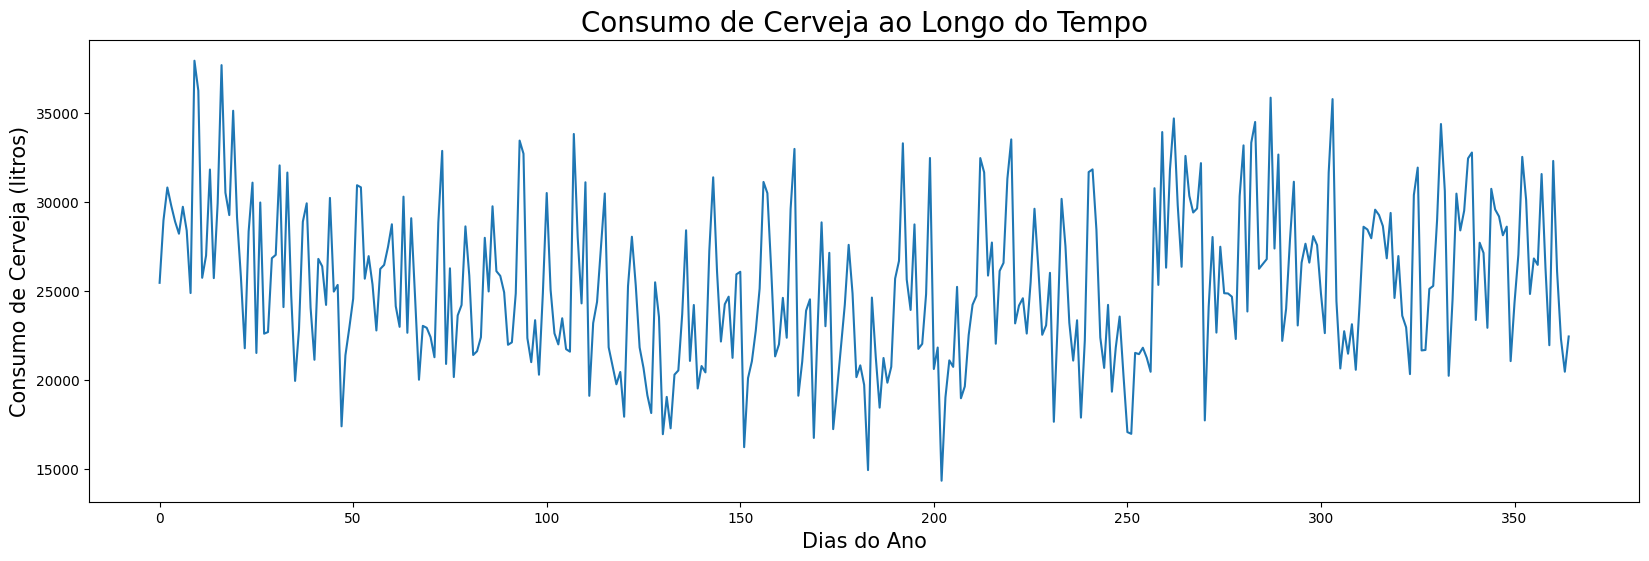

In [17]:
# Criação do gráfico
fig, ax = plt.subplots(figsize=(20, 6))

# Plotando os dados no gráfico
ax.plot(df['consumo'])

# Adicionando título e rótulos
ax.set_title('Consumo de Cerveja ao Longo do Tempo', fontsize=20)
ax.set_xlabel('Dias do Ano', fontsize=15)
ax.set_ylabel('Consumo de Cerveja (litros)',fontsize=15)

# Exibindo o gráfico
plt.show()

### Boxplot com váriavel dependente(x) e independente(y)

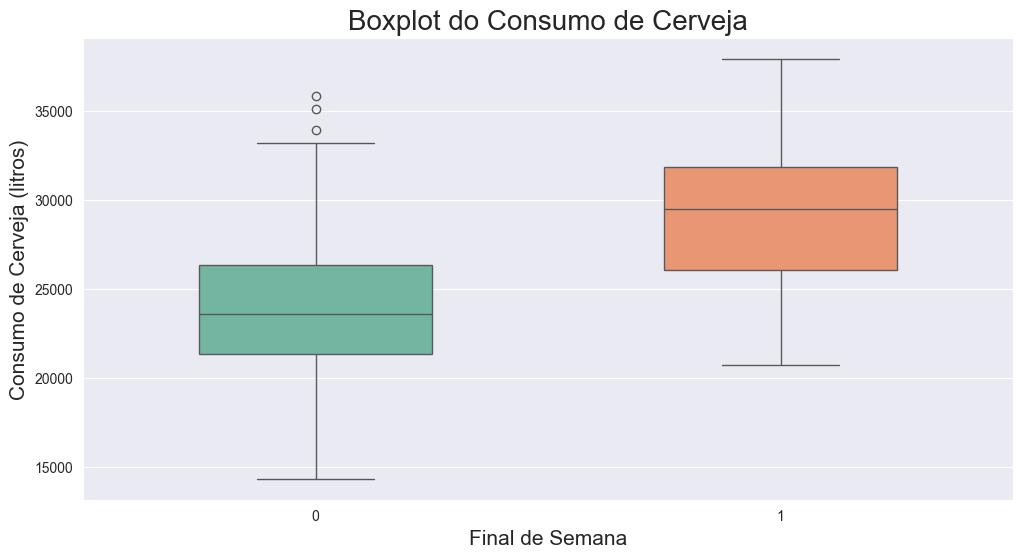

In [18]:
#Criando um box plot com variavel dependende(y) e variavel independente(x)

sns.set_palette('Accent')
sns.set_style('darkgrid')

# Criando o boxplot
ax = sns.boxplot(y='consumo', x='fds', data=df, orient='v', width=0.5, hue='fds', palette='Set2', legend=False)

# Ajustando o tamanho da figura
ax.figure.set_size_inches(12, 6)

# Adicionando título e rótulos
ax.set_title('Boxplot do Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (litros)', fontsize=15)
ax.set_xlabel('Final de Semana', fontsize=15)

# Exibindo o gráfico
plt.show()

Se observam alguns valores outliers. Eu pensei sobre e imaginei que fossem feriados.

### Histograma - Distribuição de Frequências

<Axes: title={'center': 'Consumo Cerveja'}, xlabel='Fim de Semana', ylabel='Consumo de cerveja (L)'>

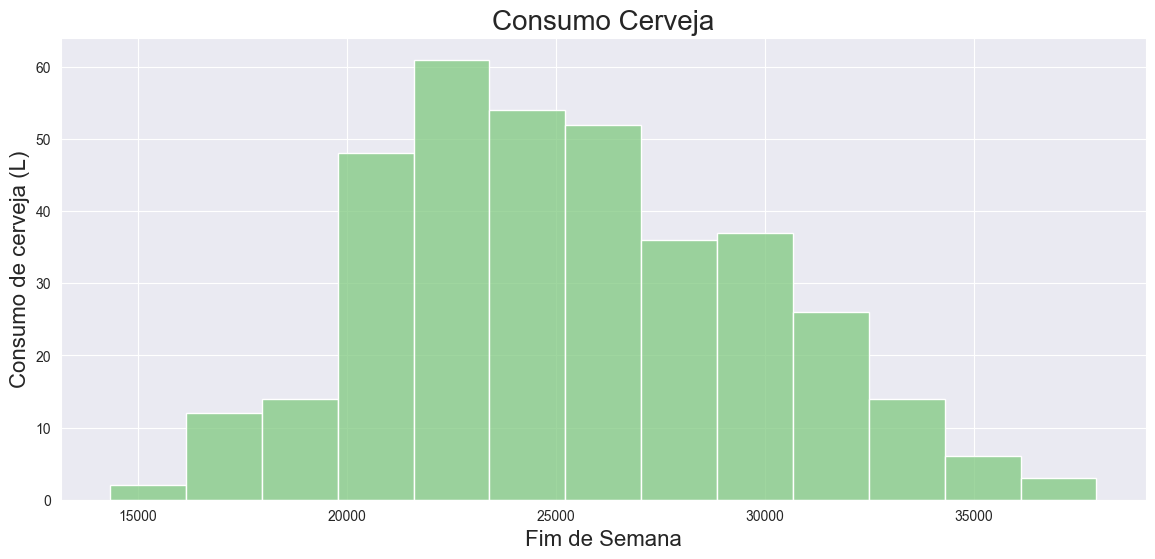

In [24]:
ax = sns.histplot(df['consumo'])
ax.figure.set_size_inches(14,6)
ax.set_title('Consumo Cerveja',fontsize=20)
ax.set_ylabel('Consumo de cerveja (L)',fontsize=16)
ax.set_xlabel('Fim de Semana',fontsize=16)
ax

### Dispersão

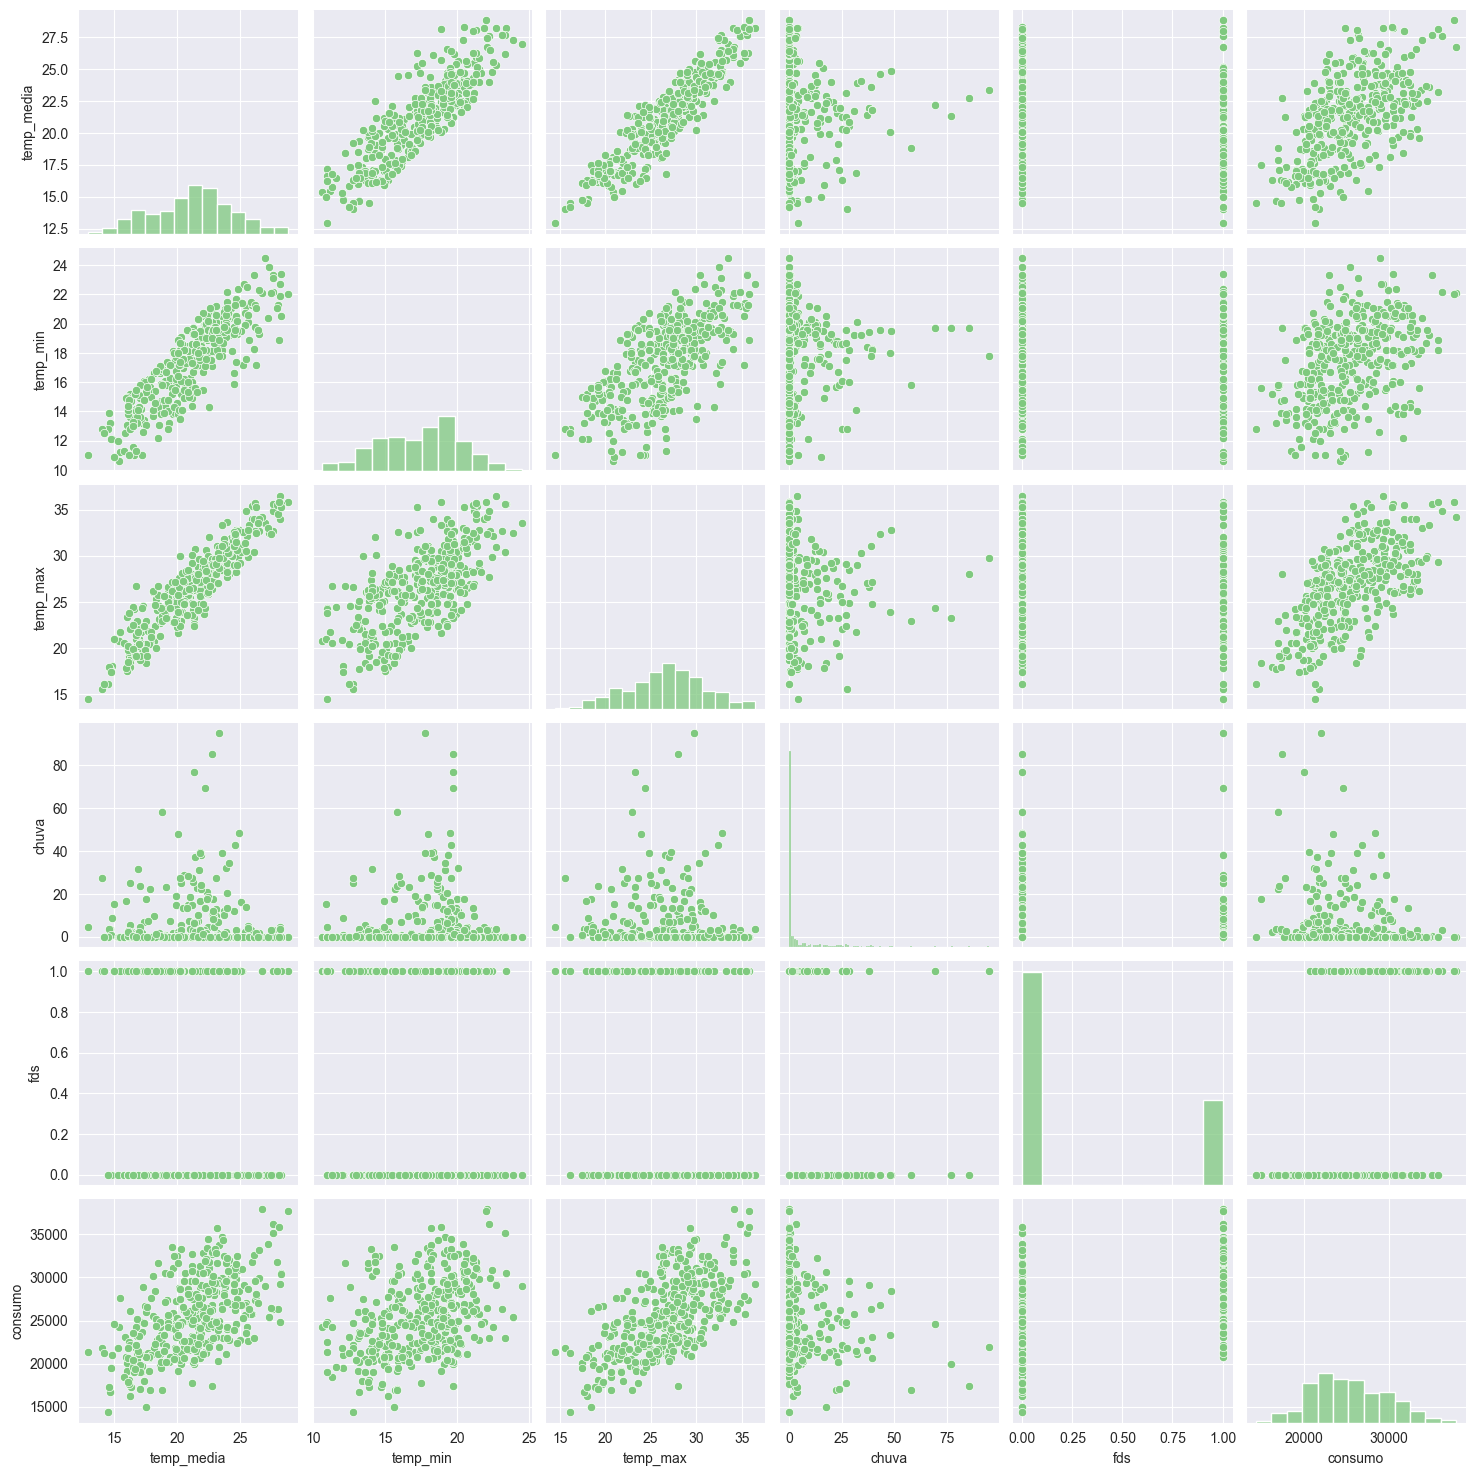

In [25]:
ax = sns.pairplot(df)


### Dispersão entre as variáveis

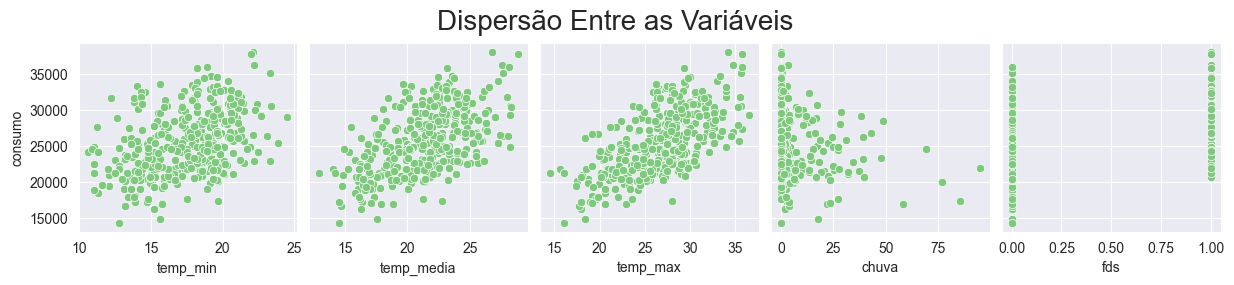

In [29]:
ax = sns.pairplot(df,y_vars='consumo',x_vars=['temp_min','temp_media','temp_max','chuva','fds'],)
ax.fig.suptitle('Dispersão Entre as Variáveis',fontsize=20,y=1.1)
ax

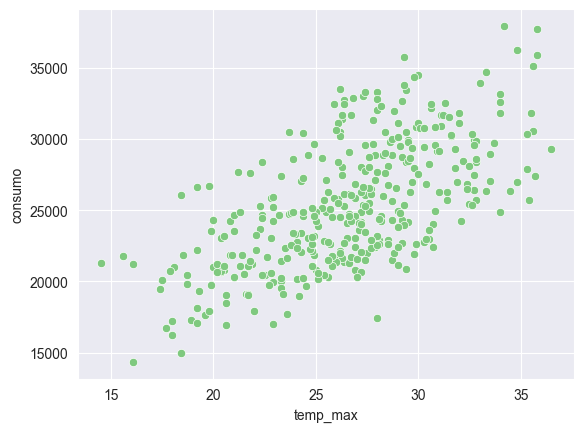

In [31]:
# Dispersão = Variável independente

sns.set_palette('Accent')
sns.set_style('darkgrid')

# Criando o scatterplot

ax = sns.scatterplot(x='temp_max', y='consumo', data=df)

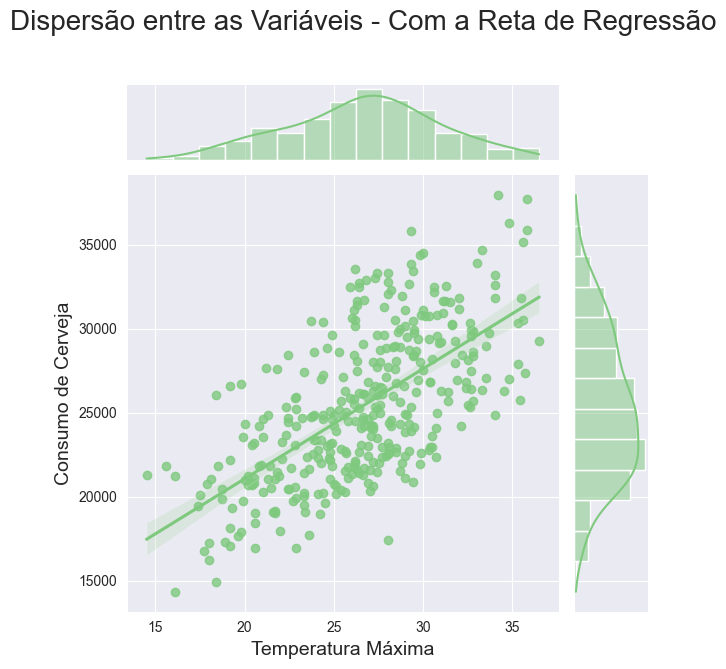

In [32]:
ax = sns.jointplot(x='temp_max',y='consumo',data=df, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis - Com a Reta de Regressão',fontsize=20,y=1.1)
ax.set_axis_labels('Temperatura Máxima','Consumo de Cerveja',fontsize=14)
ax

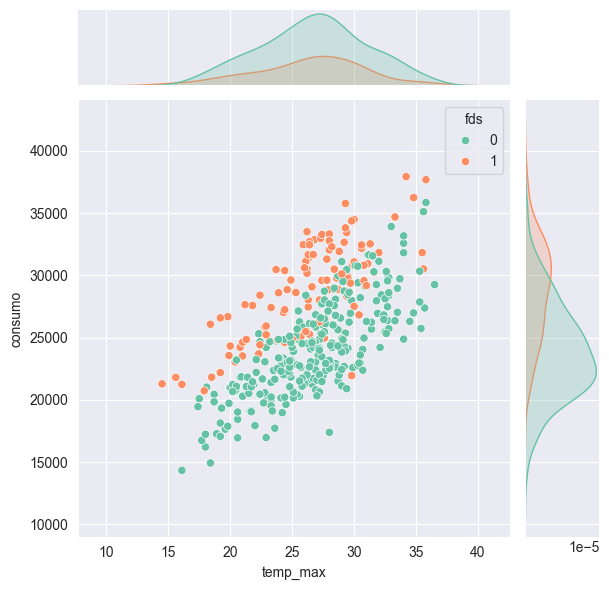

In [33]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Criando o gráfico

sns.jointplot(
    x='temp_max',
    y='consumo',
    data=df,
    hue='fds',
    palette='Set2',
)

Observa-se que durante o final de semana, o consumo é sempre maior

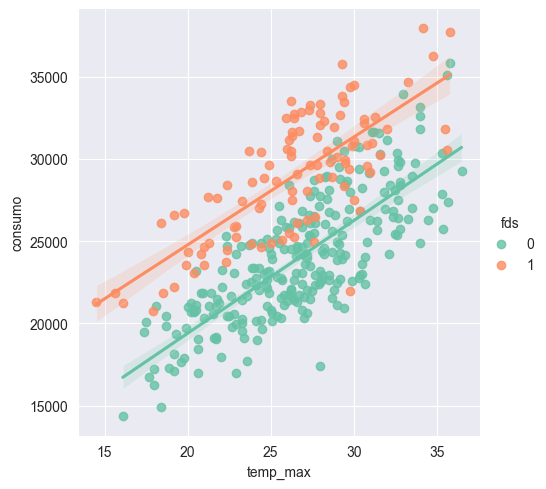

In [34]:
# Lmplot

sns.set_palette('Accent')
sns.set_style('darkgrid')

# Criando o gráfico

sns.lmplot(
    x='temp_max',
    y='consumo',
    data=df,
    hue='fds',
    palette='Set2',
)

Aqui é possível ver claramente a variação do consumo de acordo com o momento da semana.

# Implementação do Modelo de Regressão Linear

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
# Criando uma series no pandas e armazenar o consumo de cerveja(y)

y = df['consumo']

In [39]:
# Criando um dataframe pandas para armazenar variaveis explicativas (x)

x = df[['temp_max', 'chuva', 'fds']]

In [46]:
# Datasets de Treino e de Teste (70/30)  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

### Tamanho e amostras de treino e teste

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((255, 3), (110, 3), (255,), (110,))

In [48]:
X_train.shape[0] + X_test.shape[0]

365

### Importando o Sklearn metrics


In [49]:
from sklearn import metrics

In [50]:
# Intanciando a classe LinearRegression()
modelo = LinearRegression()

In [51]:
modelo.fit(x_train, y_train)

LinearRegression()

## Calculando o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

### Coeficiente de Determinação R²
O coeficiente de determinação é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entre 0 e 1.

In [55]:
print('R² = {:.2f}'.format(modelo.score(x_train, y_train)))

R² = 0.71


### Gerando previsões para os dados de Teste (x_tesste) utilizando o método predict() do objeto modelo.

In [56]:
y_previsto = modelo.predict(x_test)

### Obtendo o coeficiente de determinacao (R²) para previsões do nosso modelo

In [57]:
print('R² = {:.2f}'.format(metrics.r2_score(y_test, y_previsto)))

R² = 0.75


## Obtendo previsões pontuais

### Dados de entrada

In [61]:
entrada = x_test[0:1]
entrada

,temp_max,chuva,fds
193,28.7,0.0,0


### Gerando previsão pontual

In [64]:
modelo.predict(entrada)[0]

np.float64(25554.14149913581)

### Criando um simulador simples

In [71]:
temp_max = 40.5
chuva = 12.2
fds = 1
entrada = [[temp_max, chuva, fds]]

print('Consumo médio de cerveja = {0:.2f} Litros'. format(modelo.predict(entrada)[0]))

Consumo médio de cerveja = 38118.61 Litros
